In [39]:
import pandas as pd
import os
import matplotlib.pyplot as plt

## Simple Fully Connected Network
Training, and validation stats of Network with 2 dense layers

In [40]:
#Fully connected networks
df_1 = pd.read_csv(os.getcwd() + '/../outputs/model_1_stats.csv')
df_2 = pd.read_csv(os.getcwd() + '/../outputs/model_2_stats.csv')
df_3 = pd.read_csv(os.getcwd() + '/../outputs/model_3_stats.csv')
#Convolutional network
df_4 = pd.read_csv(os.getcwd() + '/../outputs/model_4_stats.csv')


In [41]:
df_1.head()

,Unnamed: 0,Train loss,train accuracy,valid loss,valid accuracy
0,0,1.853035,63.480357,1.798497,69.807143
1,1,1.794405,70.737500,1.789491,71.435714
2,2,1.782865,71.933929,1.785797,71.864286
3,3,1.778634,72.344643,1.773321,73.521429
4,4,1.774433,72.903571,1.772459,73.600000


In [42]:
df_1 = df_1.drop('Unnamed: 0', axis=1)

In [43]:
df_1.head()

,Train loss,train accuracy,valid loss,valid accuracy
0,1.853035,63.480357,1.798497,69.807143
1,1.794405,70.737500,1.789491,71.435714
2,1.782865,71.933929,1.785797,71.864286
3,1.778634,72.344643,1.773321,73.521429
4,1.774433,72.903571,1.772459,73.600000


In [54]:
def plot_model(x, train_loss, valid_loss, train_acc, valid_acc, model):
    """Plot the training loss against the validation loss"""

    fig, axs = plt.subplots(ncols = 2, nrows = 1, figsize=(16, 6))
    
    axs[0].plot(x, train_loss, label= 'Training Loss')
    axs[0].plot(x, valid_loss, label= 'Validation Loss')

    axs[0].legend()

    axs[0].set_title(f"Loss by epoch in {model}")
    axs[0].set_xlabel("Epoch")
    axs[0].set_ylabel("Loss")
    axs[0].set_ylim(1, 2)

    axs[1].plot(x, train_acc, label= 'Training accuracy')
    axs[1].plot(x, valid_acc, label= 'Validaiton accuracy')

    axs[1].set_yticks(range(0, 101, 10))
    axs[1].legend()

    axs[1].set_title(f'Accuracy by epoch in {model}')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Accuracy')
    axs[1].set_ylim(0,100)

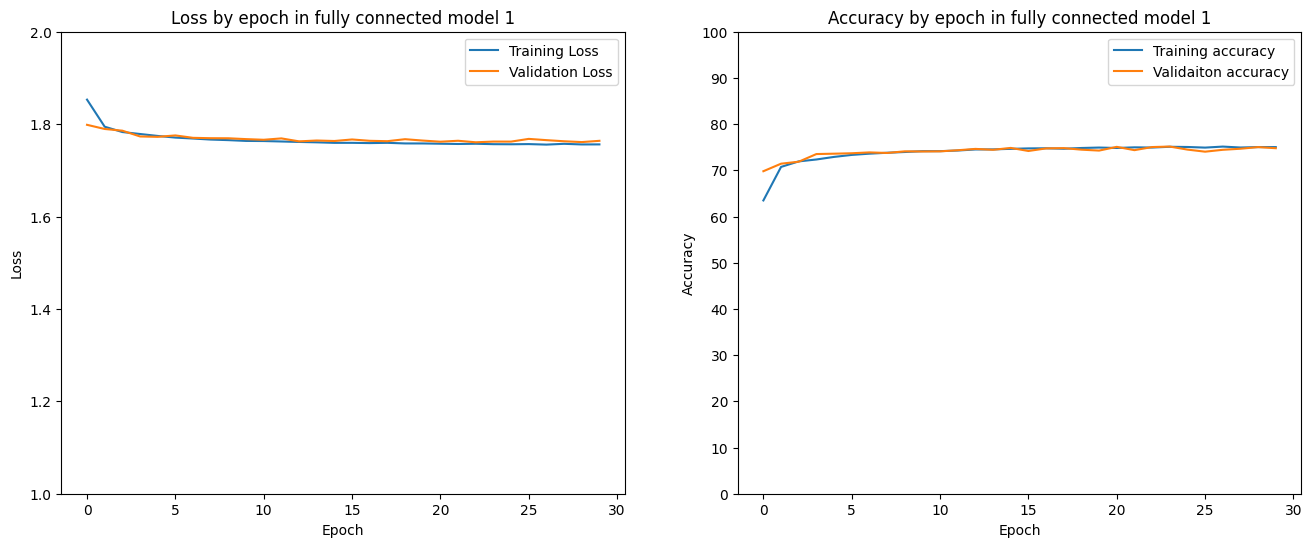

In [55]:
plot_model(df_1.index, df_1['Train loss'], df_1['valid loss'], df_1['train accuracy'], df_1['valid accuracy'], 'fully connected model 1')


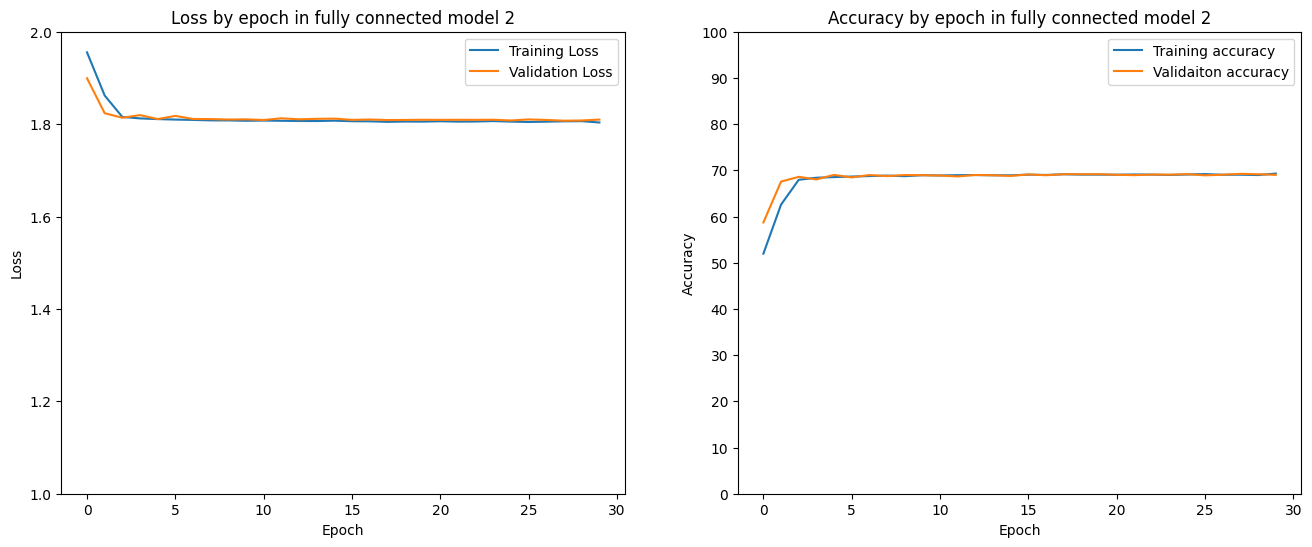

In [56]:
plot_model(df_2.index, df_2['Train loss'], df_2['valid loss'], df_2['train accuracy'], df_2['valid accuracy'], 'fully connected model 2')


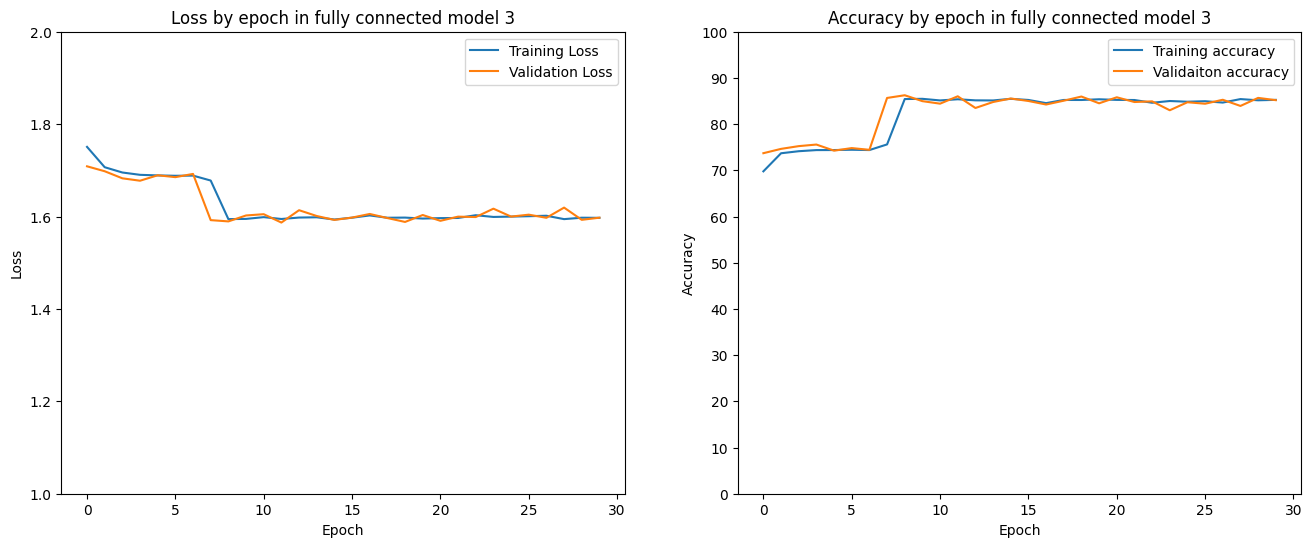

In [57]:
plot_model(df_3.index, df_3['Train loss'], df_3['valid loss'], df_3['train accuracy'], df_3['valid accuracy'], 'fully connected model 3')


As we can see, out of the 3 fully connected models, model 3 performed the best. With a validation accuracy of ~82-85%, it performed much better than the other 2 models, which had validation accuracies of ~75% and ~67% respectively. The increase in performance is likely due to the change in the layer width and layer depth. The first model comprised 2 hidden dense layers, each with only 14 neurons. Model 2 was comprised of a singular hidden dense layer, but had 397 neurons (the mean of the input and output layer). Due to the thin and shallowness of the models respectively, it's possible they could not capture more intricate relationships in the data and thus suffered from underfitting.

The third model had 3 hidden dense layers where each subsequent layer squared the number of neurons as the last, starting with 32. It's likely the increased number of parameters in this model allowed it to uncover more patterns in the data and therefore increase its prediction accuracy. Although we can see the model also suffered a bit from overfitting. Which is reflected in the increased variance in the loss and accuracy of the validation set.

# Convolutional Network

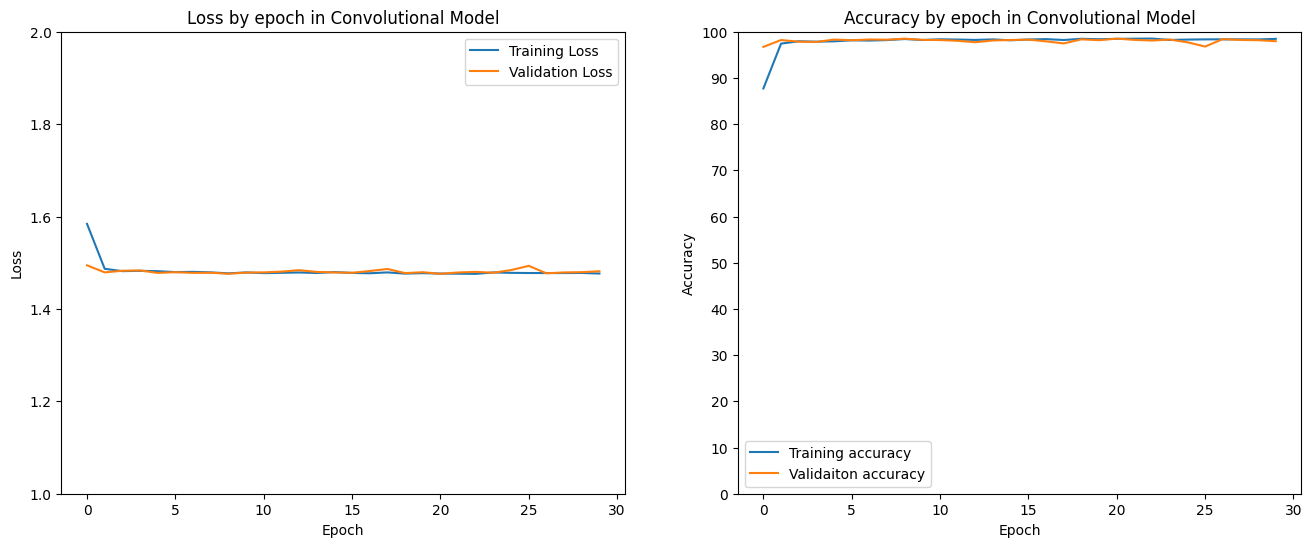

In [58]:
plot_model(df_4.index, df_4['Train loss'], df_4['valid loss'], df_4['train accuracy'], df_4['valid accuracy'], 'Convolutional Model')

The convolutional network outperformed every other model significantly with ~98% accuracy on validation data with seemingly not much overfitting. The convolutional network consisted of 2 hidden convolutional layers with a pooling layer at each and 1 hidden dense layer. The network had a total of 421,624 total parameters. Which is significantly more than the second best performing model, which had 36,842 total parameters